**Submission Instruction**

1- Save a copy

2- Replace blank with your name

3- Complete the notebook and run all the cells

4- Submit .ipynb and the requested screenshot to Gradescope

In this notebook, we are going to learn how to create a simple web application using Streamlit (https://docs.streamlit.io/get-started). Streamlit is a lightweight Python framework that lets you turn your data science and data engineering scripts into interactive web apps with very little code. Instead of writing HTML, CSS, or JavaScript, you write regular Python, and Streamlit takes care of running a web server, rendering the user interface, and updating the app whenever users interact with widgets like sliders, buttons, and selectors. This makes it ideal for quickly building agile data apps such as dashboards, data explorers, and small tools for experimenting with ETL pipelines or models.


The standard way to build a Streamlit app is to create an app.py file on your local machine and run the Streamlit server there. However, in this notebook we will use Google Colab to create and run our web app. This approach lets us explain and execute each step interactively in separate cells, and it avoids any issues related to your local operating system or Python setup

First step is to install the dependencies:

In [1]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.1 MB/s eta 0:00:00


We are going to build a lightweight web app on top of Yahoo Finance that lets us display stock prices and related news. This will give you a practical example of how Streamlit can be used to wrap an existing data source (like a finance API) with an interactive interface, so users can quickly look up a ticker, visualize recent price movements, and read the latest headlines—all from a simple browser-based app.

First let check the Yahoo data

In [2]:
import yfinance as yf

# Create ticker object for a symbol like Apple Inc.
aapl = yf.Ticker("AAPL")

# Get historical data for the given period
hist = aapl.history(start="2025-01-01", end="2025-11-01")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-02 00:00:00-05:00,247.809220,247.978468,240.731247,242.752106,55740700,0.0,0.0
2025-01-03 00:00:00-05:00,242.264297,243.080598,240.800915,242.264297,40244100,0.0,0.0
2025-01-06 00:00:00-05:00,243.210016,246.216423,242.105013,243.896912,45045600,0.0,0.0
2025-01-07 00:00:00-05:00,241.885999,244.444435,240.263348,241.119476,40856000,0.0,0.0
2025-01-08 00:00:00-05:00,240.830782,242.612732,238.969207,241.607269,37628900,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-27 00:00:00-04:00,264.623466,268.859349,264.393677,268.549652,44888200,0.0,0.0
2025-10-28 00:00:00-04:00,268.729471,269.628624,267.890289,268.739471,41534800,0.0,0.0
2025-10-29 00:00:00-04:00,269.019206,271.147148,266.851294,269.438812,51086700,0.0,0.0


In this step, we are building a small interactive Streamlit app that helps us explore historical stock prices.

We start by adding a page title using a Streamlit text element (st.title), so our app has a clear header (“Market Analysis 🚀”). Then we use a select box widget (st.selectbox) to let us choose a stock symbol from a dropdown list.

The dropdown menu (st.selectbox) will let us choose between a few example companies to analyze: Apple Inc. (AAPL), Bank of America (BAC), Shell Inc. (SHEL), and UnitedHealth Group (UNH). By selecting one of these options, we tell our Streamlit app which stock’s historical prices it should download and visualize in the chart.

Then we create two date input widgets (st.date_input) so we can pick the start and end dates for our analysis. We could use also simple input widget, but the date_input shows calendar object.

Finally, We add a button (st.button("Show")) that acts as an explicit trigger—when we click it. Streamlit renders a button widget on the page, and
every time the app reruns (which happens on any interaction), st.button("Show") evaluates to: *True* only on the run immediately after the user clicks the button.or *False* on all other runs. Because of the if, the code inside the block executes only when the button was just clicked.

If the show buttom is clicked, we visualize the result with a built-in chart element (st.area_chart), which plots the closing prices as an area chart.

Streamlit supports several kinds of data visualizations beyond st.area_chart:
st.line_chart(df) for time series or trends, st.bar_chart(df) for comparisons across categories, st.scatter_chart(df) for showing relationships between two variables.

You can also create any Matplotlib (or Seaborn) figure and display it with st.pyplot(fig). Essentially, if you can plot it in Python, you can almost always show it inside a Streamlit app.

Lastly, we want to create app.py on the server with this code, so we use the %%writefile directive to tell the notebook to save the cell’s contents into the app.py file. We will then run this file as our Streamlit app.

In [3]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

st.title("Market Analysis 🚀")


# Create ticker object

symbol_options = ['AAPL', 'BOC', 'SHEL', 'UNH' ]

selected_ticker = st.selectbox('Select Stock Symbol', symbol_options)
start_date_value = st.date_input("Select starting date", value=datetime(2015, 7, 1))
end_date_value = st.date_input("Select end date", value=datetime(2019, 7, 31))

if st.button("Show"):
  symbol_data = yf.Ticker(selected_ticker)
  hist = symbol_data.history(start=str(start_date_value), end=str(end_date_value))
  st.area_chart(hist['Close'])



Writing app.py


ngrok is a tunneling service that lets you expose a web server running on a private environment—either your local machine (like localhost:8501 for Streamlit) or a cloud VM/notebook such as Google Colab—to the internet through a secure, public URL. Instead of deploying your app to a real production server, ngrok creates an encrypted tunnel from your private port to a temporary public address (e.g., https://xyz.ngrok-free.app), so anyone with that link can access your app. It’s especially useful for demos, webhooks, or teaching situations where students or collaborators need to see something running on your laptop or in a Colab notebook, without dealing with DNS, firewalls, or full cloud deployment.


To use the ngrok serive, you need NGROK_AUTH_TOKEN. To obtain your NGROK_AUTH_TOKEN, go to the ngrok website (https://ngrok.com/) and create a free account (or log in if you already have one), then open the Dashboard. In the left sidebar, look for something like “Getting Started” → “Your Authtoken” or “Auth”; on that page you’ll see a long string of characters labeled Auth Token or Your Authtoken.

In [4]:
NGROK_AUTH_TOKEN = "35hxxjyxSZDfTZ5PHWNg5EHy7iZ_2y565Gh8aACBSuUzZP9oq"

from pyngrok import ngrok
ngrok.set_auth_token(NGROK_AUTH_TOKEN)


Now, we’re going to programmatically launch a Streamlit app and exposing it to the internet via ngrok. We can also directly use the commandline to run the app:

python -m streamlit run app.py --server.port 8501

After running the code you will get the ngrok public url for your web app.

In [5]:
import subprocess
import time
from pyngrok import ngrok

def start_streamlit():
    # Start Streamlit in the background

  # Kill previous tunnels if any
  ngrok.kill()

  # Start Streamlit in the background
  process = subprocess.Popen(
      ["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"]
  )

  # Wait a bit for Streamlit to start
  time.sleep(5)

  # Create a public URL
  public_url = ngrok.connect(8501, "http")
  print("Public URL:", public_url)

start_streamlit()


Public URL: NgrokTunnel: "https://pneumococcal-fernando-cataractous.ngrok-free.dev" -> "http://localhost:8501"


Now that are first simple one page web app is working, we are going to create multi-page web app. The navigation and paging is a little bit complicated in Streamlit. We basically have to create a global session variable to store where we are and use that to render the page.

First, we are going to create one function for each page. We have the welcome page, price page (which is what we created before) and new page.

In [6]:

%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf


st.title("Market Analysis 🚀")
symbol_options = ['AAPL', 'BOC', 'SHEL', 'UNH' ]

def welcome_page():
  st.header("Welcome to my first app in Data Engineering")

def price_page():
# Create ticker object
  selected_ticker = st.selectbox('Select Stock Symbol', symbol_options)
  start_date_value = st.date_input("Select starting date", value=datetime(2015, 7, 1))
  end_date_value = st.date_input("Select end date", value=datetime(2019, 7, 31))

  if st.button("Show"):
    symbol_data = yf.Ticker(selected_ticker)
    hist = symbol_data.history(start=str(start_date_value), end=str(end_date_value))
    st.area_chart(hist['Close'])

Overwriting app.py


On the News page, we again use Yahoo Finance to fetch the latest news related to a selected stock symbol. For each article, we will simply display the title, a short summary, a thumbnail image (if exists), and the URL

Note that we use `%%writefile -a app.py` to append this piece of code to the existing app.py file we created in the previous cell, so the news page logic becomes part of the same Streamlit app.


In [7]:
%%writefile -a app.py

def news_page():
# Create ticker object

  selected_ticker = st.selectbox('Select Stock Symbol', symbol_options)

  if st.button("Show"):
    # symbol_ticker = yf.Ticker(selected_ticker)
    ticker = yf.Ticker(selected_ticker)
    news = ticker.get_news()
    news_df = pd.json_normalize(news)
    news_df.head()

    for i in range(len(news_df)):
      st.subheader(news_df['content.title'][i])
      st.write(news_df['content.summary'][i])
      st.write(news_df['content.clickThroughUrl.url'][i])
      try:
        st.image(news_df['content.thumbnail.originalUrl'][i], width=200)
      except:
        pass
      st.divider()



Appending to app.py


Now we are going to define a dictionary of pages to keep the app’s structure clean and organized.


In [8]:
%%writefile -a app.py

pages= {}
pages["welcome_page"] = "Welcome"
pages["price_page"] = "Historical Prices"
pages["news_page"] = "News "


Appending to app.py



Normally, we have to keep the current page that we are running in a variable.However, every time we interact with a widget (change a slider, click a button), Streamlit reruns the script from top to bottom, which means local variables are recreated and “forget” their previous values. st.session_state is a special dictionary-like object that survives these reruns and stores state per user session. So everything that you need to keep across these reruns must be stored in st.session_state. Here we use it store our current page. Now based on the `current_page` variable we deside to render one of our pages by calling their corresponding function.

Finally, We create a side navigation bar using st.sidebar to let us switch between different pages in our app. The st.sidebar namespace works just like regular Streamlit commands, but everything we put there appears in a vertical panel on the left side of the screen.





In [9]:
%%writefile -a app.py
if "current_page" not in st.session_state:
    st.session_state["current_page"] = "welcome_page"
    welcome_page()

elif st.session_state.current_page == "welcome_page":
    welcome_page()

elif st.session_state.current_page == "price_page":
    price_page()

elif st.session_state.current_page == "news_page":
    news_page()


def sidebar_navigation():
    with st.sidebar:
        st.markdown("### Menu")
        if st.button(pages["welcome_page"]):
            st.session_state.current_page = "welcome_page";
            st.rerun()

        if st.button(pages["news_page"]):
            st.session_state.current_page = "news_page";
            st.rerun()

        if st.button(pages["price_page"]):
            st.session_state.current_page = "price_page";
            st.rerun()


sidebar_navigation();


Appending to app.py


Now, our app is complete. If you want to see or download the complete `app.py`, you can open the file explorer from the left menu and you can see `app.py` in your home directory.

Ok, Let's re-run our app.


In [13]:
start_streamlit()


Public URL: NgrokTunnel: "https://pneumococcal-fernando-cataractous.ngrok-free.dev" -> "http://localhost:8501"


Now, as a practice add another page to show that changes of global major index. For example for Japan (Nikkei 225) as "^N225", Germany (DAX) as "^GDAXI", and Hong Kong (Hang Seng) as "^HSI". Let the user select which major index and then display the changes (based on last two days). Here is an example:

In [11]:
import yfinance as yf

# Nikkei 225 index symbol on Yahoo Finance
symbol = "^N225"

# Create ticker and get last 2 days of data
nikkei = yf.Ticker(symbol)
hist = nikkei.history(period="2d")

# Make sure we have at least 2 rows
if len(hist) >= 2:
    prev_close = hist["Close"].iloc[-2]
    last_close = hist["Close"].iloc[-1]
    change = last_close - prev_close
    change_pct = (change / prev_close) * 100

    print("Nikkei 225 (^N225)")
    print(f"Previous close: {prev_close:.2f}")
    print(f"Last close:     {last_close:.2f}")
    print(f"Change:         {change:+.2f} ({change_pct:+.2f}%)")
else:
    print("Not enough data returned for Nikkei 225.")


Nikkei 225 (^N225)
Previous close: 48702.98
Last close:     48537.70
Change:         -165.28 (-0.34%)


Create a new app.py after this point; then call start_streamlit(). In addition to the completed notebook attach the screenshot of your web app (the screnshot must show the updated navigation bar and your page content for a selected index)

In [12]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf


st.title("Market Analysis 🚀")
symbol_options = ['AAPL', 'BOC', 'SHEL', 'UNH']

# Global indexes dictionary
index_options = {
    "Nikkei 225 (Japan)": "^N225",
    "DAX (Germany)": "^GDAXI",
    "Hang Seng (Hong Kong)": "^HSI",
    "S&P 500 (USA)": "^GSPC",
    "FTSE 100 (UK)": "^FTSE"
}

def welcome_page():
    st.header("Welcome to my first app in Data Engineering")
    st.write("Navigate through the menu to explore:")
    st.write("- **Historical Prices**: View stock price trends over time")
    st.write("- **News**: Read the latest news for selected stocks")
    st.write("- **Global Indexes**: Monitor major world stock market indexes")

def price_page():
    st.header("Historical Stock Prices")
    # Create ticker object
    selected_ticker = st.selectbox('Select Stock Symbol', symbol_options)
    start_date_value = st.date_input("Select starting date", value=datetime(2015, 7, 1))
    end_date_value = st.date_input("Select end date", value=datetime(2019, 7, 31))

    if st.button("Show"):
        symbol_data = yf.Ticker(selected_ticker)
        hist = symbol_data.history(start=str(start_date_value), end=str(end_date_value))
        st.area_chart(hist['Close'])

def news_page():
    st.header("Latest Stock News")
    # Create ticker object
    selected_ticker = st.selectbox('Select Stock Symbol', symbol_options)

    if st.button("Show"):
        ticker = yf.Ticker(selected_ticker)
        news = ticker.get_news()
        news_df = pd.json_normalize(news)

        for i in range(len(news_df)):
            st.subheader(news_df['content.title'][i])
            st.write(news_df['content.summary'][i])
            st.write(news_df['content.clickThroughUrl.url'][i])
            try:
                st.image(news_df['content.thumbnail.originalUrl'][i], width=200)
            except:
                pass
            st.divider()

def index_page():
    st.header("Global Major Indexes")
    st.write("Monitor the performance of major world stock market indexes")

    selected_index = st.selectbox('Select Global Index', list(index_options.keys()))

    if st.button("Show Index Data"):
        symbol = index_options[selected_index]
        index_ticker = yf.Ticker(symbol)
        hist = index_ticker.history(period="2d")

        if len(hist) >= 2:
            prev_close = hist["Close"].iloc[-2]
            last_close = hist["Close"].iloc[-1]
            change = last_close - prev_close
            change_pct = (change / prev_close) * 100

            # Display results in a nice format
            col1, col2, col3, col4 = st.columns(4)

            with col1:
                st.metric("Previous Close", f"${prev_close:,.2f}")

            with col2:
                st.metric("Last Close", f"${last_close:,.2f}")

            with col3:
                st.metric("Change ($)", f"${change:+,.2f}")

            with col4:
                st.metric("Change (%)", f"{change_pct:+.2f}%")

            # Summary section
            st.subheader(f"{selected_index} Performance")
            if change > 0:
                st.success(f"📈 Index is UP by ${change:,.2f} ({change_pct:+.2f}%)")
            elif change < 0:
                st.error(f"📉 Index is DOWN by ${abs(change):,.2f} ({change_pct:+.2f}%)")
            else:
                st.info("➡️ Index is UNCHANGED")
        else:
            st.warning("Not enough data available for this index. Market may be closed.")

# Page dictionary
pages = {}
pages["welcome_page"] = "Welcome"
pages["price_page"] = "Historical Prices"
pages["news_page"] = "News"
pages["index_page"] = "Global Indexes"

# Session state management
if "current_page" not in st.session_state:
    st.session_state["current_page"] = "welcome_page"
    welcome_page()

elif st.session_state.current_page == "welcome_page":
    welcome_page()

elif st.session_state.current_page == "price_page":
    price_page()

elif st.session_state.current_page == "news_page":
    news_page()

elif st.session_state.current_page == "index_page":
    index_page()

# Sidebar navigation
def sidebar_navigation():
    with st.sidebar:
        st.markdown("### Menu")
        if st.button(pages["welcome_page"]):
            st.session_state.current_page = "welcome_page"
            st.rerun()

        if st.button(pages["price_page"]):
            st.session_state.current_page = "price_page"
            st.rerun()

        if st.button(pages["news_page"]):
            st.session_state.current_page = "news_page"
            st.rerun()

        if st.button(pages["index_page"]):
            st.session_state.current_page = "index_page"
            st.rerun()

sidebar_navigation()


Overwriting app.py


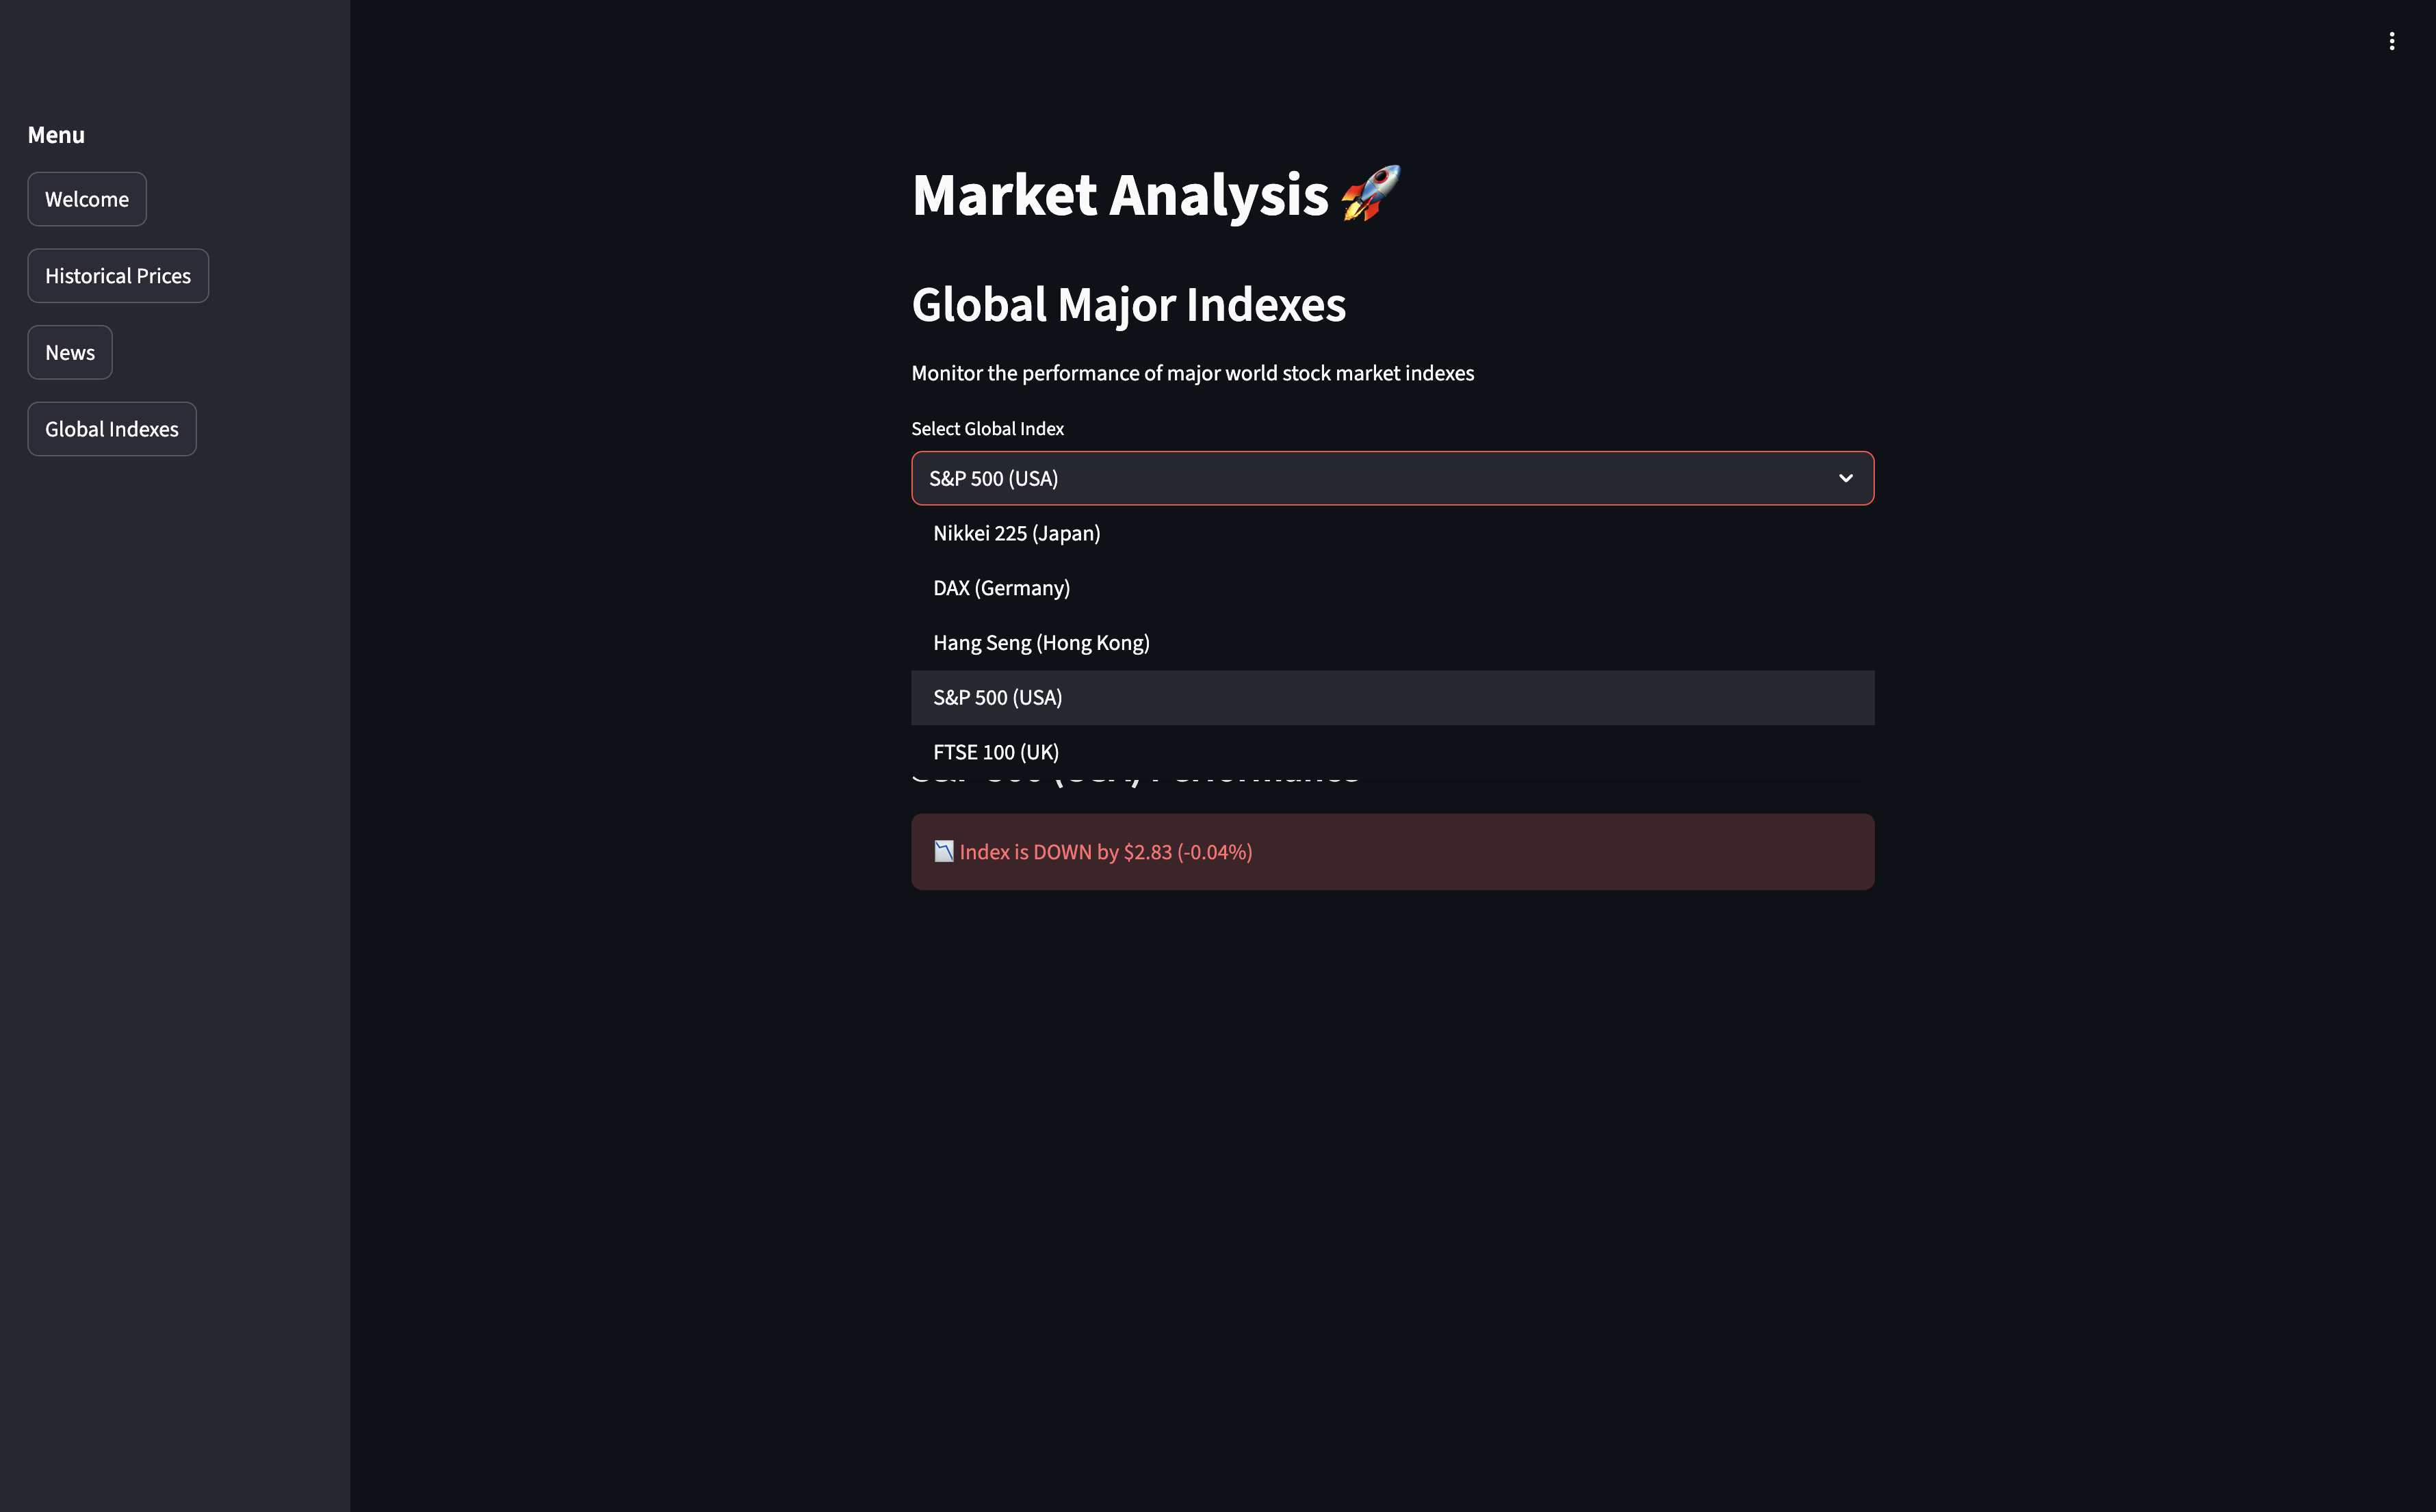